In [3]:
import os
myfile='/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Oyr_CESM2_historical_r1i1p1f1_gr_1850-2014.nc'
os.path.isfile(myfile)

True

In [1]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
from iris import *
from iris.analysis import *
from iris.analysis.cartography import *
from collections.abc import Iterable, Mapping
import operator
import iris.coords
import iris.exceptions
import numpy as np
import iris

In [8]:
path = '/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Oyr_CESM2_historical_r1i1p1f1_gr_1850-2014.nc'

my_cube = load_cube(path)
print(my_cube)

surface_downward_mass_flux_of_carbon_dioxide_expressed_as_carbon / (kg m-2 s-1) (time: 165; latitude: 180; longitude: 360)
    Dimension coordinates:
        time                                                                         x              -               -
        latitude                                                                     -              x               -
        longitude                                                                    -              -               x
    Cell methods:
        mean where sea                                                          area
        mean                                                                    time
    Attributes:
        Conventions                                                             CF-1.7 CMIP-6.2
        activity_id                                                             CMIP
        branch_method                                                           standard
        branch_time_in

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/netcdf.py:417: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]


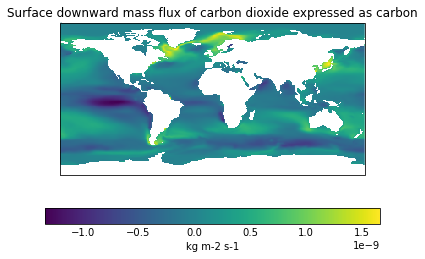

In [15]:
qplt.pcolormesh(my_cube[0])
plt.savefig('test.png')
plt.show()

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/netcdf.py:417: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  var = variable[keys]


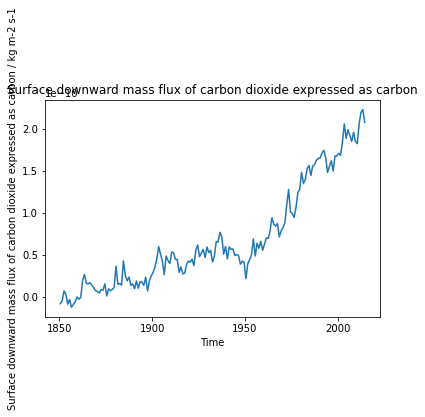

In [17]:
average_across_time=my_cube.collapsed(['time'],MEAN)
my_cube.coord('latitude')
my_cube.coord('longitude')
grid_areas = area_weights(my_cube)
average_variable = my_cube.collapsed(['latitude','longitude'],MEAN,weights=grid_areas)

#plot the timeseries:
qplt.plot(average_variable)
plt.savefig('test2.png')
plt.show()

In [18]:
import iris
from iris.coord_categorisation import *

#extracting just two months from a cube with all of teh months - here 1 and 12: January and December
cube = iris.load_cube('/Users/alicebrindley/Dropbox/YEAR_3/Dissertation/Models/dissertation_models/fgco2_Oyr_CESM2_historical_r1i1p1f1_gr_1850-2014.nc')
add_month_number(cube, 'time', name='month_number')
cube2 = cube[np.where((cube.coord('month_number').points == 12) | (cube.coord('month_number') == 1))]
add_season_year(cube2,'time',name='season_year')

#then average by the season year:
cube2.aggregated_by(['season_year'], iris.analysis.MEAN)
#cube 2 then contains the averaged for each december-january period in each year

/Users/alicebrindley/opt/miniconda3/lib/python3.9/site-packages/iris/fileformats/cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'fgco2'
  warnings.warn(


IndexError: Cannot index with zero length slice.

TEST